In [11]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('./Datasets/Social_Network_Ads.csv')

In [17]:
df = df.iloc[:,2:]
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [18]:
import seaborn as sns

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

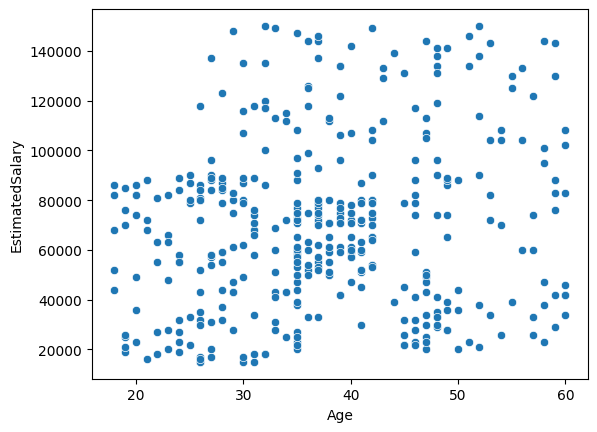

In [7]:
sns.scatterplot(x=df.iloc[:,0],y=df.iloc[:,1])

In [19]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [21]:
X_train

,Age,EstimatedSalary
205,47,47000
354,36,99000
3,27,57000
264,48,90000
194,28,89000
...,...,...
299,46,117000
22,48,41000
72,20,23000
15,29,80000


In [22]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input

In [23]:
model = Sequential()

model.add(Input(shape=(2, )))
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [24]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 513 (2.00 KB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [26]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.4563 - loss: 830.8005 - val_accuracy: 0.6000 - val_loss: 22.6924
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4561 - loss: 280.1895 - val_accuracy: 0.6000 - val_loss: 457.1594
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5829 - loss: 344.2746 - val_accuracy: 0.4000 - val_loss: 28.3522
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6082 - loss: 108.7652 - val_accuracy: 0.4000 - val_loss: 73.1548
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5836 - loss: 65.6596 - val_accuracy: 0.6000 - val_loss: 114.8671
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5522 - loss: 132.4690 - val_accuracy: 0.6000 - val_loss: 142.9090
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6244 - loss: 113.0561 - val_accuracy: 0.6000 - val_loss: 115.3995
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6002 - loss: 134.3192

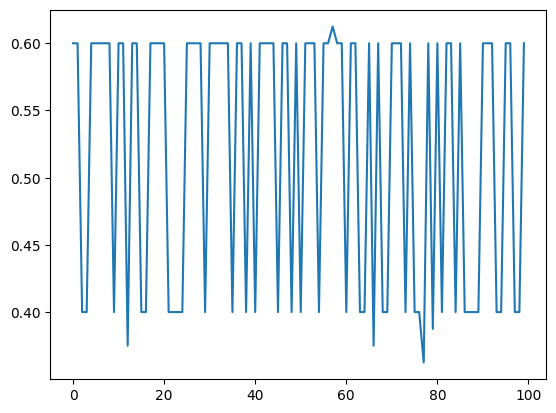

In [27]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])

## Applying scaling

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
X_train_scaled

array([[ 0.88928823, -0.65924556],
       [-0.17254846,  0.87392651],
       [-1.04132394, -0.36440478],
       [ 0.98581884,  0.6085698 ],
       [-0.94479333,  0.57908572],
       [ 0.40663519,  0.01888824],
       [ 0.98581884,  2.11225779],
       [ 0.31010458, -0.30543662],
       [ 1.7580637 , -0.27595254],
       [-0.17254846,  2.20071003],
       [ 1.7580637 ,  1.0213469 ],
       [-1.33091576, -1.48479975],
       [ 2.04765553,  0.54960165],
       [ 1.27541066,  1.90586924],
       [-1.13785454,  0.31372902],
       [-0.36560968, -0.77718187],
       [-1.71703819,  0.49063349],
       [-0.5586709 , -1.51428383],
       [ 0.31010458, -0.71821372],
       [ 0.02051275, -0.57079333],
       [ 0.02051275,  0.04837232],
       [-0.07601785, -0.51182517],
       [-0.6552015 , -1.51428383],
       [ 0.02051275,  0.31372902],
       [ 0.31010458,  0.07785639],
       [-0.46214029, -1.13099081],
       [-0.75173211, -1.54376791],
       [-0.26907907, -0.65924556],
       [-1.13785454,

<Axes: >

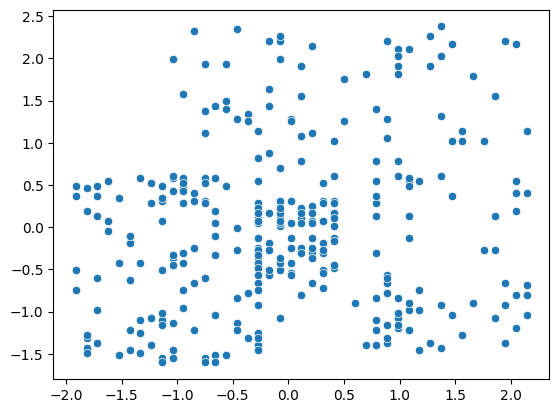

In [30]:
sns.scatterplot(x=X_train_scaled[:,0],y=X_train_scaled[:,1])

In [31]:
model = Sequential()

model.add(Input(shape=(2, )))
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

history = model.fit(X_train_scaled,y_train,validation_data=(X_test_scaled,y_test),epochs=100)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.5316 - loss: 0.6746 - val_accuracy: 0.7625 - val_loss: 0.6287
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7677 - loss: 0.6244 - val_accuracy: 0.9125 - val_loss: 0.5745
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8392 - loss: 0.5781 - val_accuracy: 0.8375 - val_loss: 0.5285
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8629 - loss: 0.5373 - val_accuracy: 0.8250 - val_loss: 0.4889
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8679 - loss: 0.4917 - val_accuracy: 0.8250 - val_loss: 0.4548
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8378 - loss: 0.4753 - val_accuracy: 0.8250 - val_loss: 0.4252
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8731 - loss: 0.4527 - val_accuracy: 0.8500 - val_loss: 0.4007
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8866 - loss: 0.4164 - val_accuracy: 0.8500 - 

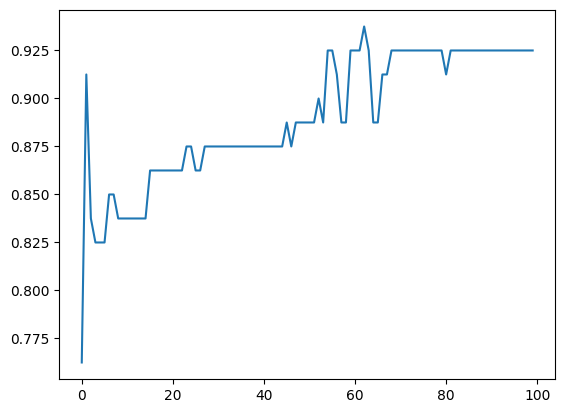

In [32]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])